In [2]:
import sys
sys.path.insert(1, "../")
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [7]:
data = scipy.io.loadmat("../data/v1_laminar.mat")

srate = data["srate"]
timevec = data["timevec"].T
signal = np.mean(data["csd"][6, :, :], axis=1)

h = .01; 

gtime =  np.arange(-1,1,1/srate)
gaus = np.exp( -4*np.log(2)*gtime**2 / h**2 )
gaus = gaus/sum(gaus) 


ndata = len(signal)
nkern = len(gaus)
nConv = ndata+nkern - 1
halfK = nkern//2


dataX = scipy.fft.fft(signal, n=nConv)
kernX = scipy.fft.fft(gaus, n=nConv)

convresX = dataX * kernX

convres = scipy.fft.ifft(convresX)

convres = convres[halfK:-halfK+1]

C:\Users\kerem\AppData\Local\Temp\ipykernel_13772\250237088.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gtime =  np.arange(-1,1,1/srate)


c:\Users\kerem\anaconda3\envs\forlearning\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


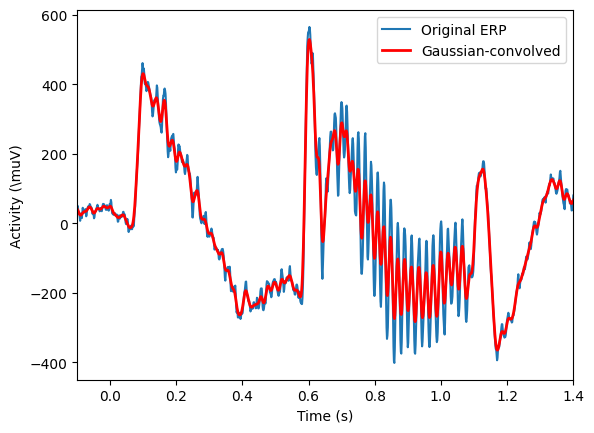

In [8]:
plt.plot(timevec, signal, label="Original ERP")
plt.plot(timevec, convres,"r",linewidth=2, label="Gaussian-convolved")

plt.xlim([-.1, 1.4])
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Activity (\muV)")
plt.show()